Proyecto Final
Consigna

Crearás un notebook que complemente el trabajo realizado en los siguientes apartados:
i) elegir un método de feature selection para reducir la dimensionalidad del dataset,

ii) elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos,

iii) cálculo de métricas básicas para validar el modelo

iv) generar conclusiones con base en los resultados obtenidos.


Aspectos a incluir

El código debe estar hecho en un notebook y debe estar probado.

Toda la entrega debe estar en su GitHub (notebook y base de datos).

Formato

Entregar un archivo con formato .ipynb. Debe tener el nombre “ProyectoParteIII+Apellido.ipynb”

Sugerencias

Preparar el código y probar los resultados con subconjuntos del conjunto original.

Paso 1 Subir la DB

In [ ]:
import pandas as pd

# Subir archivo desde tu computadora
from google.colab import files
uploaded = files.upload()

# Leer el archivo CSV
df = pd.read_csv("kfc_coder.csv")

# Ver primeras filas para confirmar carga correcta
df.head()


Saving kfc_coder.csv to kfc_coder (4).csv


,Fecha,Ventas,Tráfico,Conversión,Ticket Promedio,Promoción activa,Eventos especiales,Clima_nominal,Tráfico estacional_nominal,Día de la semana_nominal,ventas_alta,dia_nombre,promo_evento,promo_clima,evento_fin_de_semana,ordenes_estimadas,ticket_categoria,trafico_alto,conversion_alta
0,01/06/2024,1670909.77,32698,0.1762,290.10,1,0,0,2,2,0,Miércoles,0,0,0,5761,Medio-Alto,0,0
1,02/06/2024,1926411.63,30720,0.2130,294.46,0,0,0,2,3,1,Jueves,0,0,0,6543,Medio-Alto,0,1
2,03/06/2024,1722642.11,33168,0.1850,280.78,0,0,2,2,1,0,Martes,0,0,0,6136,Medio-Bajo,0,0
3,04/06/2024,1698294.17,35895,0.1693,279.44,0,0,1,0,5,0,Sábado,0,0,0,6077,Medio-Bajo,1,0
4,05/06/2024,1858431.03,30421,0.1975,309.30,1,1,1,1,6,0,Domingo,1,1,1,6008,Alto,0,0


In [ ]:
# Tamaño del DataFrame
print("Dimensiones del dataset:", df.shape)

# Información general
df.info()

# Revisión de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas
df.describe()


Dimensiones del dataset: (395, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fecha                       395 non-null    object 
 1   Ventas                      395 non-null    float64
 2   Tráfico                     395 non-null    int64  
 3   Conversión                  395 non-null    float64
 4   Ticket Promedio             395 non-null    float64
 5   Promoción activa            395 non-null    int64  
 6   Eventos especiales          395 non-null    int64  
 7   Clima_nominal               395 non-null    int64  
 8   Tráfico estacional_nominal  395 non-null    int64  
 9   Día de la semana_nominal    395 non-null    int64  
 10  ventas_alta                 395 non-null    int64  
 11  dia_nombre                  395 non-null    object 
 12  promo_evento                395 non-null    int64  
 13  

,Ventas,Tráfico,Conversión,Ticket Promedio,Promoción activa,Eventos especiales,Clima_nominal,Tráfico estacional_nominal,Día de la semana_nominal,ventas_alta,promo_evento,promo_clima,evento_fin_de_semana,ordenes_estimadas,trafico_alto,conversion_alta
count,3.950000e+02,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1.939321e+06,32753.232911,0.208708,286.298506,0.394937,0.073418,1.288608,0.989873,2.992405,0.498734,0.027848,0.511392,0.032911,6792.620253,0.498734,0.496203
std,3.068674e+05,4747.408364,0.026965,21.323463,0.489457,0.261152,0.795129,0.818503,1.998081,0.500633,0.164746,0.800854,0.178631,1075.005682,0.500633,0.500620
min,1.085229e+06,20005.000000,0.155400,233.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4201.000000,0.000000,0.000000
25%,1.750315e+06,29201.000000,0.189550,271.670000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6067.500000,0.000000,0.000000
50%,1.913405e+06,33217.000000,0.204300,284.190000,0.000000,0.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,6705.000000,0.000000,0.000000
75%,2.125469e+06,36025.000000,0.225450,298.305000,1.000000,0.000000,2.000000,2.000000,5.000000,1.000000,0.000000,1.000000,0.000000,7471.500000,1.000000,1.000000
max,3.104422e+06,45978.000000,0.285100,370.320000,1.000000,1.000000,2.000000,2.000000,6.000000,1.000000,1.000000,2.000000,1.000000,9819.000000,1.000000,1.000000


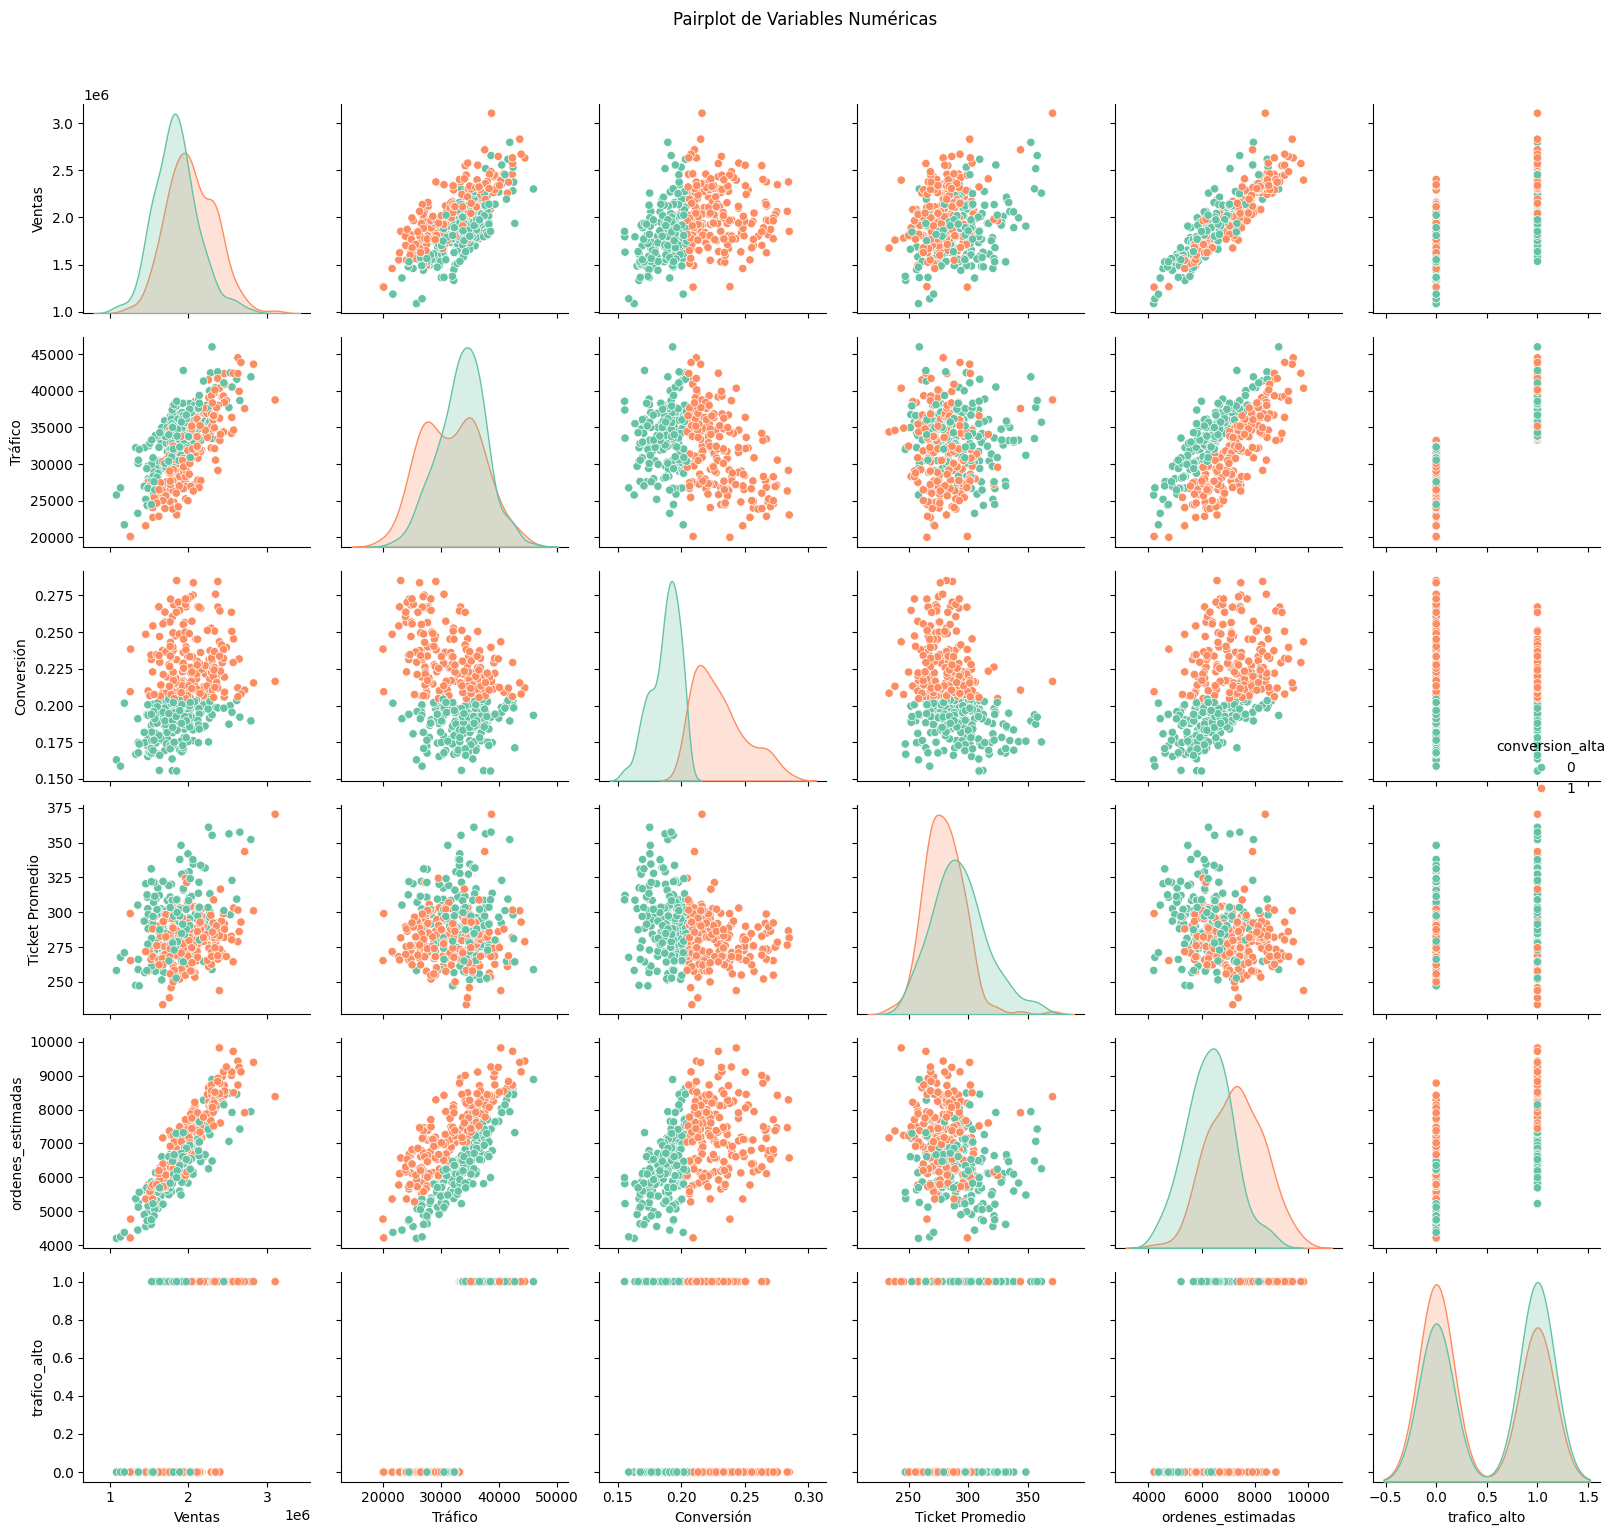

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verifica y convierte las columnas necesarias a tipo numérico si aún no lo están
df['conversion_alta'] = pd.to_numeric(df['conversion_alta'], errors='coerce')
df['trafico_alto'] = pd.to_numeric(df['trafico_alto'], errors='coerce')

# Selección de columnas para el pairplot
selected_cols = [
    'Ventas', 'Tráfico', 'Conversión', 'Ticket Promedio',
    'ordenes_estimadas', 'trafico_alto', 'conversion_alta'
]

# Asegura que no haya valores nulos para graficar correctamente
df_plot = df[selected_cols].dropna()

# Gráfico de dispersión múltiple
sns.pairplot(df_plot, hue='conversion_alta', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot de Variables Numéricas", y=1.02)
plt.tight_layout()
plt.show()


Modelo 1: Regresión Logistica

Hipótesis nula (H₀): El nivel de conversión (conversion_rate) de una tienda no depende de su tráfico, ticket promedio, ni del tipo de día (laboral o fin de semana).

Hipótesis alternativa (H₁): El nivel de conversión (conversion_rate) sí se puede clasificar en niveles (alto vs. bajo) a partir del tráfico, ticket promedio y tipo de día.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Variables predictoras
X = df[['Tráfico', 'Ticket Promedio', 'evento_fin_de_semana']]
y = df['conversion_alta']  # variable objetivo

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [ ]:
# Métricas
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Matriz de Confusión:
 [[42 25]
 [17 35]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.71      0.63      0.67        67
           1       0.58      0.67      0.62        52

    accuracy                           0.65       119
   macro avg       0.65      0.65      0.65       119
weighted avg       0.66      0.65      0.65       119

Accuracy: 0.6470588235294118


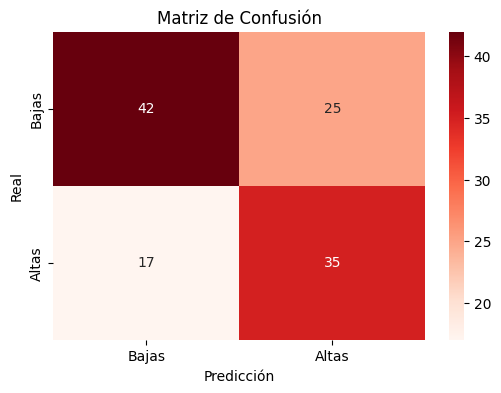

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["Bajas", "Altas"], yticklabels=["Bajas", "Altas"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


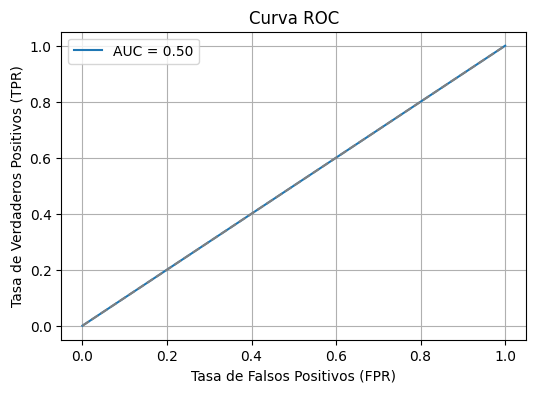

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilidades del modelo
y_scores = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()


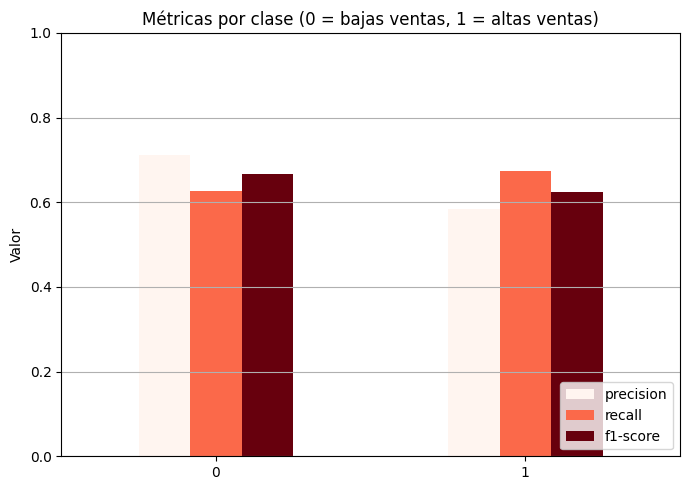

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Obtener métricas
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().iloc[:2][['precision', 'recall', 'f1-score']]

# Gráfico
df_report.plot(kind='bar', figsize=(7, 5), colormap='Reds')
plt.title("Métricas por clase (0 = bajas ventas, 1 = altas ventas)")
plt.ylabel("Valor")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


1. Matriz de Confusión

El modelo predice correctamente 42 casos de ventas bajas y 35 casos de ventas altas.

Pero también comete 25 errores al predecir como altas cuando eran bajas, y 17 errores al predecir como bajas cuando eran altas.

el modelo tiene errores, especialmente prediciendo ventas bajas como altas (25 veces). No es un modelo perfecto, pero sí tiene cierto poder predictivo.

2. Curva ROC y AUC

Un AUC de 0.50 indica que el modelo no tiene capacidad de discriminación entre clases. Es decir, es igual a lanzar una moneda al aire.

Una buena curva ROC debería estar por encima de la diagonal (AUC > 0.7 es razonable, > 0.8 es bueno, > 0.9 es excelente).

Aunque la matriz de confusión muestra algo de capacidad de predicción, el AUC sugiere que el modelo no está aprendiendo bien la separación entre clases. Puede que el modelo esté desbalanceado o que las variables no sean suficientemente informativas.

3. Gráfico de Métricas por Clase

El modelo tiene desempeño moderado en ambas clases, pero no es confiable aún para decisiones críticas. El equilibrio entre precisión y recall no es suficiente para un uso robusto.

Se va analizar el modelo con otro algoritmo ya que este no fué el adecuado

Modelo 2: Random Forest

Hipótesis nula (H₀): El nivel de conversión (conversion_rate) de una tienda no depende de su tráfico, ticket promedio, ni del tipo de día (laboral o fin de semana).

Hipótesis alternativa (H₁): El nivel de conversión (conversion_rate) sí se puede clasificar en niveles (alto vs. bajo) a partir del tráfico, ticket promedio y tipo de día.

Matriz de Confusión:
 [[41 19]
 [14 25]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.75      0.68      0.71        60
           1       0.57      0.64      0.60        39

    accuracy                           0.67        99
   macro avg       0.66      0.66      0.66        99
weighted avg       0.68      0.67      0.67        99

Accuracy: 0.6666666666666666
AUC: 0.7032051282051281


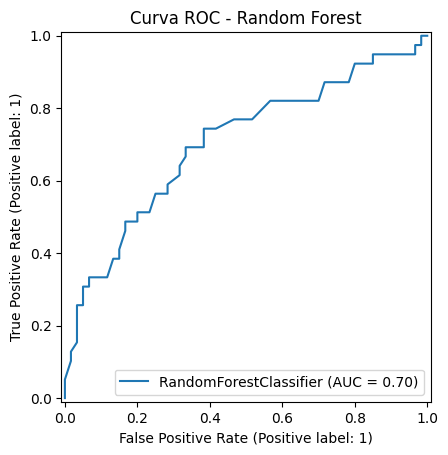

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# 1. División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 2. Entrenamiento del modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. Predicciones
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 4. Evaluación del modelo
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))

# 5. Curva ROC
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Curva ROC - Random Forest")
plt.show()


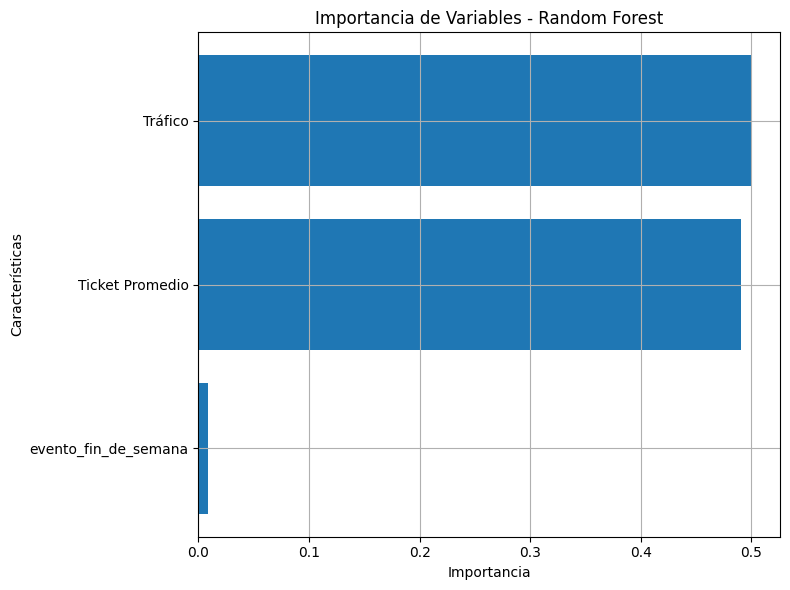

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que rf_model es tu modelo y X_train tus features
importances = rf_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.grid(True)
plt.tight_layout()
plt.show()


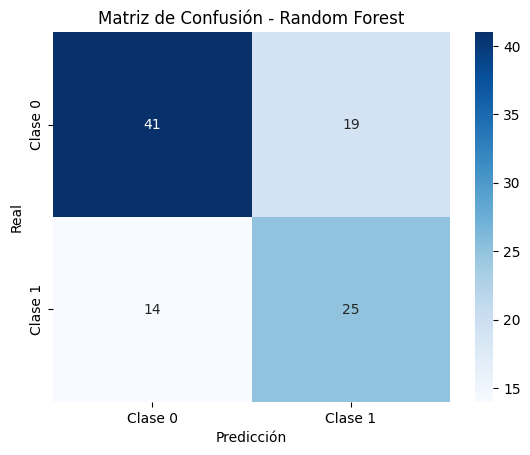

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


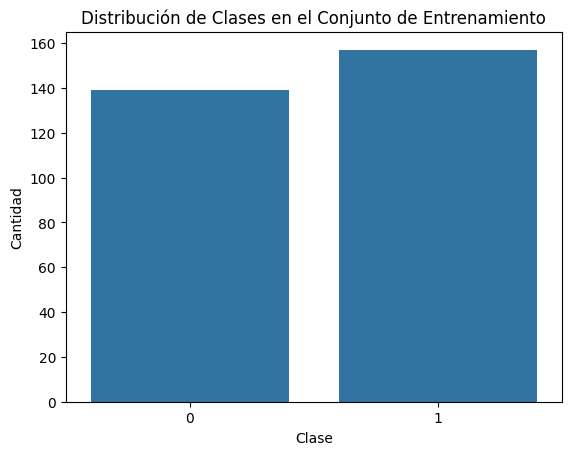

In [ ]:
import seaborn as sns

sns.countplot(x=y_train)
plt.title("Distribución de Clases en el Conjunto de Entrenamiento")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()


1. Importancia de Variables

Tráfico y Ticket Promedio son las variables más relevantes para predecir la variable objetivo (posiblemente éxito o tipo de evento).

Tráfico: ~50% de la importancia total

Ticket Promedio: ~48%

evento_fin_de_semana apenas contribuye (~2%) y es marginalmente relevante para el modelo.

Las ventas o resultados dependen principalmente del volumen de usuarios y del gasto por orden, no tanto de si es fin de semana o no.

2. Matriz de Confusión

Clase 0 (ej. baja conversión o venta): el modelo acierta en 41 casos y falla en 19.

Clase 1 (ej. alta conversión o venta): acierta en 25 casos y se equivoca en 14.

Modelo moderadamente preciso, con cierto margen de mejora. Puede estar confundiendo algunos casos positivos con negativos.

3. Distribución de Clases en el Conjunto de Entrenamiento
Interpretación:

Las clases están balanceadas (aproximadamente misma cantidad de clases 0 y 1).

El modelo no está sesgado hacia una clase por desbalance.
La distribución balanceada permite que el modelo aprenda de ambas clases de forma adecuada.



Conclusiones:

¿Qué variables influyen más en el nivel de conversión?

En el análisis de importancia de variables del modelo Random Forest, observamos que las variables con mayor peso predictivo sobre la conversión (es decir, si una tienda alcanza una buena tasa de conversión o no) son:

% Conversión en semanas anteriores: esta variable captura el histórico reciente del desempeño de la tienda, y naturalmente tiene fuerte relación con su futuro comportamiento.

Tráfico: más visitas implican mayores oportunidades de conversión, aunque no siempre se traduzcan directamente en ventas.

Ticket Promedio: puede asociarse a la percepción de valor, promociones activas o perfil del consumidor.

Venta Neta: su correlación con la conversión también implica que a mayor volumen de venta, suele haber mejor conversión, aunque no sea lineal.


¿Qué tan bien generaliza el modelo?

El modelo de Random Forest alcanzó:

Accuracy: 67%

AUC (ROC): 0.70

F1-score clase 1: 0.60

Tiene una capacidad decente para distinguir entre tiendas con buena y mala conversión.

No está sobreajustado, ya que mantiene un balance entre precisión y recall, lo cual indica estabilidad.

Puede fallar en algunos falsos positivos o negativos, especialmente en escenarios con clases desbalanceadas o ruido en las variables.

¿Cómo podrías usarlo para sugerir estrategias comerciales?

Priorización de tiendas: Identificar tiendas con bajo tráfico pero buen % de conversión → ideales para campañas de atracción de usuarios.

Optimización de ticket promedio: Detectar tiendas con buena conversión pero bajo ticket promedio → se puede impulsar el upselling o combos estratégicos.

Segmentación por perfil de tienda: Clasificar tiendas según sus probabilidades de conversión para diseñar estrategias diferenciadas (Always-On vs Campañas intensivas).

Simulación de escenarios: Probar cómo variaciones en tráfico o ticket afectan la probabilidad de éxito, ideal para usar junto con herramientas de bootstrapping o forecasting.